## 1.	Determine which film genres are at present high performing at the box office.

In [174]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [175]:
data1  = pd.read_csv('genre_averages.csv')
data1.head()

,Genre,averagerating,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI
0,Biography,6.971795,2.545666e+07,3.469678e+07,7.231284e+07,1.070096e+08,8.155297e+07,640.203056
1,Animation,6.498425,8.679362e+07,1.173423e+08,3.215562e+08,4.388985e+08,3.521049e+08,485.791763
2,Romance,6.280126,2.055426e+07,2.973649e+07,6.367772e+07,9.341421e+07,7.285994e+07,479.335480
3,Mystery,6.016742,2.137133e+07,3.143797e+07,7.013449e+07,1.015725e+08,8.020112e+07,981.774402
4,Sci-Fi,6.155500,7.100522e+07,9.272728e+07,2.499700e+08,3.426973e+08,2.716921e+08,341.363291


# 4.	Establish whether there is a relationship between film genre rating (review) and box office performance

In [176]:
# Read the file genre_average_updated.csv
data3 = pd.read_csv('genre_average_updated.csv')
data3.head()

#This file contains 9 columns and 22 rows
# This file is essential to this objective because it contains numerical data that can be statisticallly analyzed

,Genre,averagerating,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI,movie_count
0,Romance,6.280126,2.055426e+07,2.973649e+07,6.367772e+07,9.341421e+07,7.285994e+07,479.335480,317
1,Music,6.445556,2.024911e+07,4.066417e+07,8.954808e+07,1.302122e+08,1.099631e+08,414.095814,90
2,Family,6.217986,5.403068e+07,7.109600e+07,1.675690e+08,2.386650e+08,1.846343e+08,569.397770,139
3,Comedy,6.177358,3.363656e+07,4.817198e+07,1.077924e+08,1.559644e+08,1.223278e+08,435.458791,742
4,News,6.800000,1.660000e+07,9.403741e+06,3.668208e+07,4.608582e+07,2.948582e+07,135.016469,3


## 4.1. The first step is to check the disribution movies per genre in this analysis and determine the average rating of each Genre

### This process will involve ploting bar graphs that show this distribution.

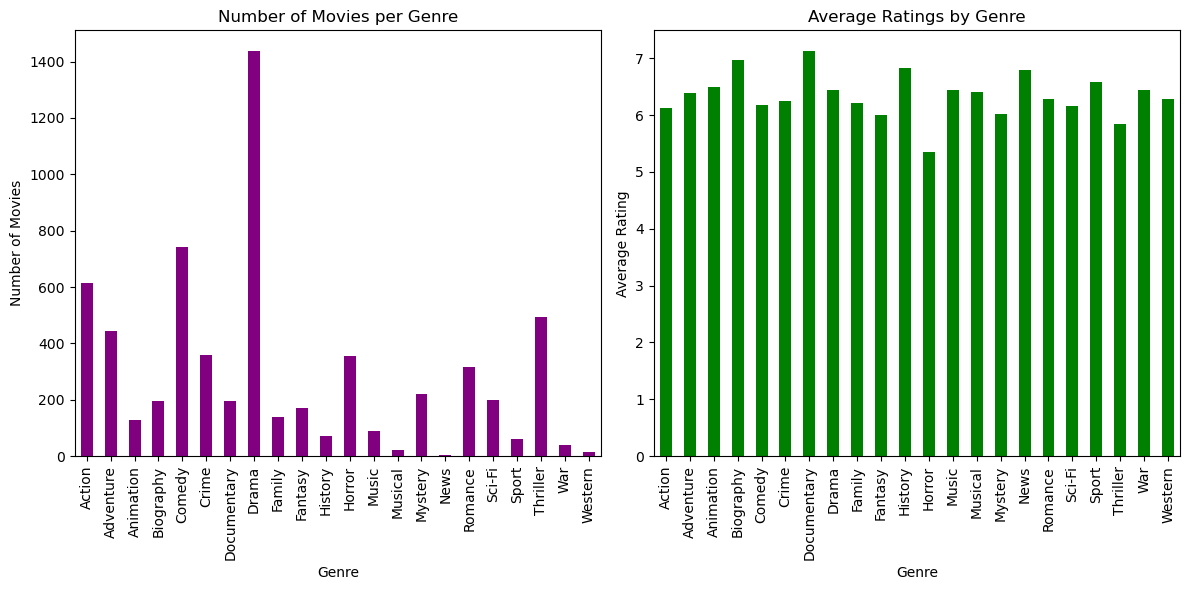

In [177]:
# Genre Breakdown: Number of Movies and Average Ratings
genre_count = data3.groupby('Genre')['movie_count'].sum()
average_ratings_by_genre = data3.groupby('Genre')['averagerating'].mean()

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
genre_count.plot(kind='bar', color='purple', ax=ax1)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')

ax2 = plt.subplot(1, 2, 2)
average_ratings_by_genre.plot(kind='bar', color='green', ax=ax2)
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

### The graph above show the distribution of movies in each genre type. The Genre 'Drama' had the highest count of movies used in this analysis while the Genre 'news' had the least count of movies used in this analysis	

### The second graph shows the average rating of each genre plotted in the graph. The Genre 'Documentary' had the the highest average rating while the Genre 'Horro' had the least average rating

## 4.2. Conducting corelation analysis will allws us to measure linear relationship between two variables; in this case, we are chcking for a relationship between Rating and Box Office Revenue

### Here we are using pearson correlation analysis

In [178]:
# Using Person correlation
correlation_matrix = data3[['averagerating', 'total_revenue']].corr(method='pearson')
pearson_corr = correlation_matrix.loc['averagerating', 'total_revenue'] 

# Print result
print("Pearson Correlation Coefficient between Rating and Box Office Revenue:", pearson_corr)

Pearson Correlation Coefficient between Rating and Box Office Revenue: -0.1417037171982216


### Weak Positive Correlation: The coefficient of 0.1843 is close to 0, implying that there is only a minor linear association between the two variables. In practical terms, higher ratings are not strongly predictive of higher box office revenue.

### Real-World Implications: Other factors beyond ratings might play a larger role in determining box office success. These could include marketing efforts, star power, release timing, and the movie's genre.